## ``Using the Models``

[Back to Main](../Project.ipynb)

After successfully training our models on the CIFAR-10 and Fashion MNIST datasets, the next logical step is to see them in action. It's one thing to achieve high accuracy on test datasets, but how do the models fare when faced with new, unseen images? In this section, we will use our trained models to predict the classes of several sample images. This will not only demonstrate the capabilities of our models but also provide a glimpse into their potential real-world applications.

## Import dependencies

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the trained models
cifar_model = load_model('../saved_models/cifar_model_trained.keras')
fmnist_model = load_model('../saved_models/fmnist_model_trained.keras')


### ``Predicting with the Models``

In the following code sections, we define functions to predict the class of a given image using both the CIFAR-10 and Fashion MNIST models. These functions load and preprocess the image, feed it to the model, and then translate the model's output into a human-readable class name.

In [2]:
# Function to predict class of a given image using CIFAR-10 model
def predict_cifar(img_path, model):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize to [0,1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict the class
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)

    # Return class name
    class_names_cifar = ["airplane", "automobile", "bird", "cat", "deer", 
                         "dog", "frog", "horse", "ship", "truck"]
    return class_names_cifar[predicted_class]

# Function to predict class of a given image using Fashion MNIST model
def predict_fmnist(img_path, model):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(28, 28), color_mode="grayscale")
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize to [0,1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict the class
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)

    # Return class name
    class_names_fmnist = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
                          "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
    return class_names_fmnist[predicted_class]


### ``Visualizing Predictions``

Now, we'll use the prediction functions to classify several sample images and visualize the results. This will allow us to gauge the model's predictions in a more tangible manner and understand its decision-making process.

1/1 [==============================] - 0s 214ms/step
Image path: ../Images/Cifar/truck.jpg
1/1 [==============================] - 0s 28ms/step
Image path: ../Images/Cifar/airplane.jpg
1/1 [==============================] - 0s 25ms/step
Image path: ../Images/Cifar/dog.jpg
1/1 [==============================] - 0s 24ms/step
Image path: ../Images/Cifar/cat.jpg
1/1 [==============================] - 0s 29ms/step
Image path: ../Images/Cifar/car.jpg
1/1 [==============================] - 0s 24ms/step
Image path: ../Images/Cifar/bird.jpg


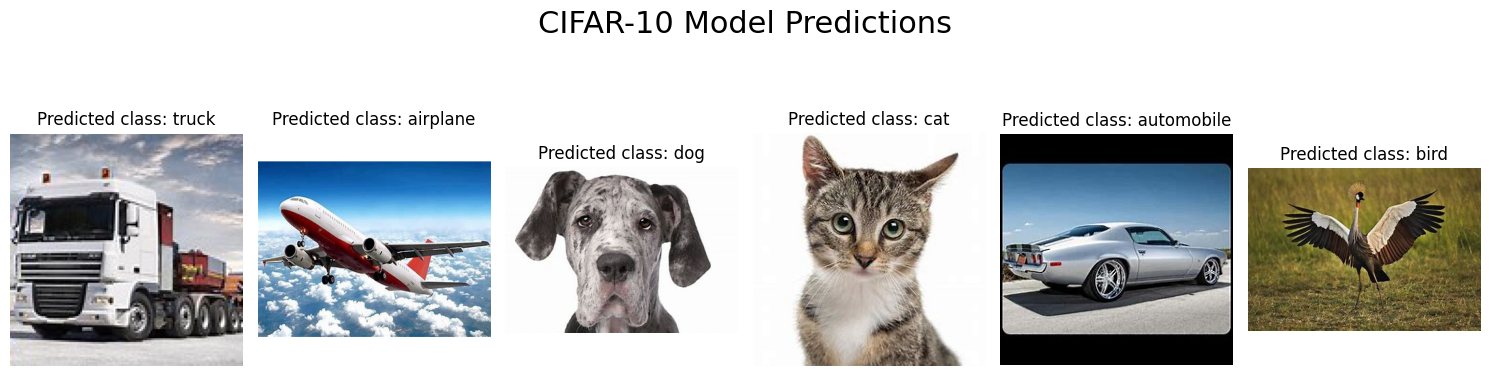

1/1 [==============================] - 0s 69ms/step
Image path: ../Images/Mnist/bag1.jpg
1/1 [==============================] - 0s 23ms/step
Image path: ../Images/Mnist/T-shirt-Top.jpg
1/1 [==============================] - 0s 26ms/step
Image path: ../Images/Mnist/t-shirt.jpg
1/1 [==============================] - 0s 20ms/step
Image path: ../Images/Mnist/T-shirt-Top1.jpg
1/1 [==============================] - 0s 20ms/step
Image path: ../Images/Mnist/bag.jpg


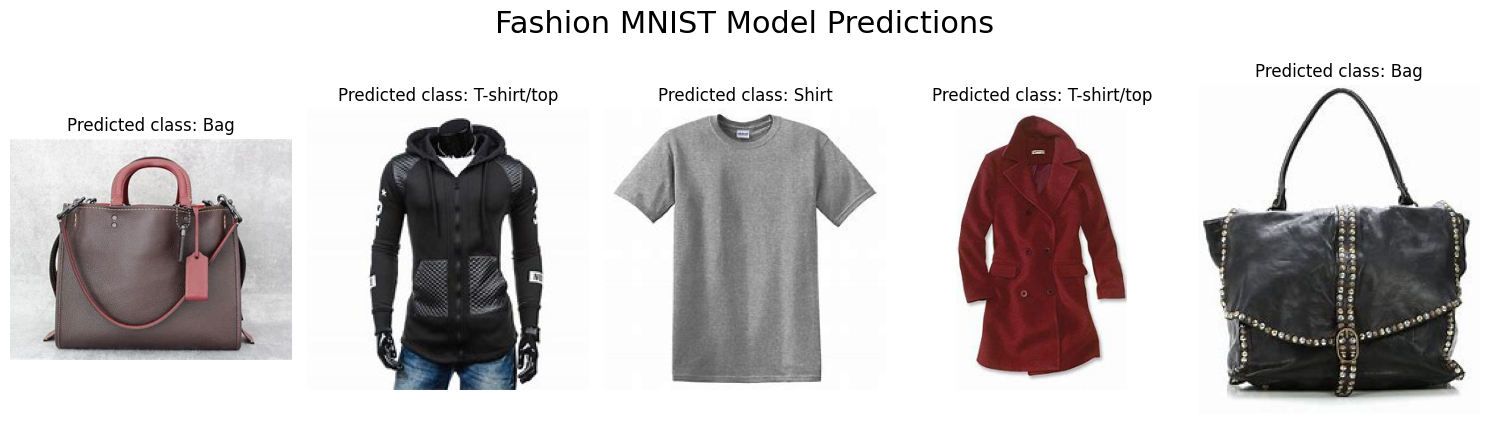

In [3]:
# Function to visualize the prediction
def visualize_prediction(img_path, prediction, ax):
    # Load the image
    img = image.load_img(img_path)
    ax.imshow(img)
    ax.axis('off')  # To turn off axes
    ax.set_title(f'Predicted class: {prediction}')

# Path to the CIFAR-10 model file for rekognition
img_paths_cifar = ["../Images/Cifar/truck.jpg", "../Images/Cifar/airplane.jpg", "../Images/Cifar/dog.jpg", 
                   "../Images/Cifar/cat.jpg", "../Images/Cifar/car.jpg", "../Images/Cifar/bird.jpg"]

# Path to the Fashion MNIST model file for rekognition
img_paths_fmnist = ["../Images/Mnist/bag1.jpg", "../Images/Mnist/T-shirt-Top.jpg", "../Images/Mnist/t-shirt.jpg", 
                    "../Images/Mnist/T-shirt-Top1.jpg", "../Images/Mnist/bag.jpg"]

# plot the images with predictions using the CIFAR-10 model
fig, axes = plt.subplots(1, len(img_paths_cifar), figsize=(15, 5))
for img_path, ax in zip(img_paths_cifar, axes):
    prediction = predict_cifar(img_path, cifar_model)
    print(f'Image path: {img_path}')
    visualize_prediction(img_path, prediction, ax)
plt.tight_layout()
fig.suptitle('CIFAR-10 Model Predictions', fontsize=22)
plt.show()

# plot the images with predictions using the Fashion MNIST model
fig, axes = plt.subplots(1, len(img_paths_fmnist), figsize=(15, 5))
for img_path, ax in zip(img_paths_fmnist, axes):
    prediction = predict_fmnist(img_path, fmnist_model)
    print(f'Image path: {img_path}')
    visualize_prediction(img_path, prediction, ax)
plt.tight_layout()
fig.suptitle('Fashion MNIST Model Predictions', fontsize=22)
plt.show()


[Back to Main](../Project.ipynb)
